In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Chapter 2 Problems
## 2.1
The following data are temperature measurements $z$ made every minute on a chemical reactor.
***

In [2]:
temps = [200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200,
         202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206,
         207, 206, 200, 203, 203, 200, 200, 195, 202, 204]

### a) Plot the time series

Text(0, 0.5, 'Temperature')

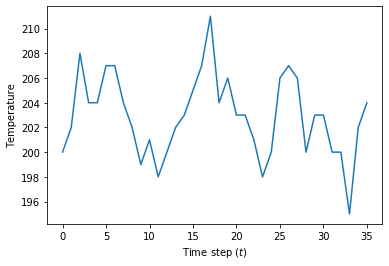

In [8]:
plt.plot(list(range(len(temps))), temps)
plt.xlabel('Time step ($t$)')
plt.ylabel('Temperature')

### b) Plot $z_{t+1}$ versus $z_t$

Text(0, 0.5, '$z_{t+1}$')

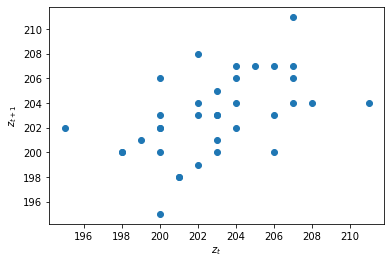

In [7]:
x = temps[:-1]
y = temps[1:]
fig, axs = plt.subplots(1)
axs.scatter(x,y)
axs.set_xlabel("$z_t$")
axs.set_ylabel("$z_{t+1}$")

### c) Plot $z_{t+2}$ versus $z_t$

Text(0, 0.5, '$z_{t+2}$')

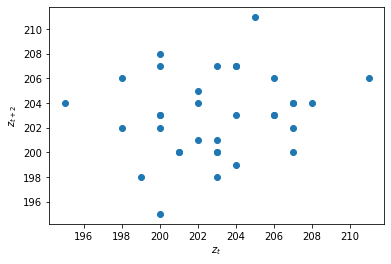

In [9]:
x = temps[:-2]
y = temps[2:]
fig, axs = plt.subplots(1)
axs.scatter(x,y)
axs.set_xlabel("$z_t$")
axs.set_ylabel("$z_{t+2}$")

#### After inspecting the graphs, do you think the series is autocorrelated?

Yes. The first autocorrelation plot seems somewhat correlated, while the second seems totally uncorrelated.

## 2.2
State whether or not a stationary stochastic process can have the following values of autocorrelations.
***

In [11]:
def corr_test_imp(rho):
    # We assume rho_k for k > 2 is zero.
    if abs(rho[0]) > 1:
        return False
    if abs(rho[1]) > 1:
        return False
    alpha = (rho[1]-rho[0]**2)/(1-rho[0]**2)
    if abs(alpha) > 1:
        return False
    return True

def corr_test(rho):
    if corr_test_imp(rho):
        print("This could be a stationary process")
    else:
        print("This can't be a stationary process")

### a) $\rho_1 = 0.80$, $\rho_2 = 0.55$, $\rho_k = 0$ for $k > 2$

In [12]:
rho = [0.80, 0.55]
corr_test(rho)

This could be a stationary process


### b) $\rho_1 = 0.80$, $\rho_2 = 0.28$, $\rho_k = 0$ for $k > 2$

In [14]:
rho = [0.80, 0.28]
corr_test(rho)

This can't be a stationary process


## 2.3
Two stochastic processes $z_{1t}$ and $z_{2t}$ have the following autocovariance functions:

\begin{align}
z_{1t}: & \gamma_0 = 0.5, \gamma_1 = 0.2, \gamma_j = 0 \quad (j >= 2) \\
z_{2t}: & \gamma_0 = 2.30, \gamma_1 = -1.43, \gamma_2 = 0.30, \gamma_j = 0 \quad (j >= 3) \\
\end{align}
    
Calculate the autocovariance function of the process $z_{3t} = z_{1t}+2z_{2t}$ and verify that it is a valid stationary process.
***

I assume the $z_{1t}$ and $z_{2t}$ are uncorrelated.

We must first compute $\gamma_0$, $\gamma_1$, and $\gamma_2$.

\begin{align}
\gamma_k & = E[(z_{3t}-\mu_{3t})(z_{3t+k}-\mu_{3t+k})] \\
& = E[(z_{1t}+2z_{2t}-\mu_{1t}-2\mu_{2t})(z_{1t+k}+2z_{2t+k}-\mu_{1t+k}-2\mu_{2t+k})] \\
& = E[((z_{1t}-\mu_{1t})+2(z_{2t}-\mu_{2t}))((z_{1t+k}-\mu_{1t+k})+2(z_{2t+k}-\mu_{2t+k}))] \\
& = E[(z_{1t}-\mu_{1t})(z_{1t+k}-\mu_{1t+k})]+4E[(z_{2t}-\mu{2t})(z_{2t+k}-\mu{2t+k})]+2E[(z_{1t}-\mu_{1t})(z_{2t+k}-\mu_{2t+k})] + 2E[(z_{1t+k}-\mu_{1t+k})(z_{2t}-\mu_{2t})] \\
& = \gamma_k^{1t} + 4\gamma_k^{2t}
\end{align}


In [17]:
gamma1 = np.array([0.5, 0.2, 0], dtype=np.float32)
gamma2 = np.array([2.30, -1.43, 0.30], dtype=np.float32)
gamma = gamma1+4*gamma2
print(gamma)

[ 9.7  -5.52  1.2 ]


We now produce the covariance matrix for $z_{3t}$ and test that its determinant is greater than 0.

In [28]:
rho = gamma/gamma[0]
auto_corr_mat = np.array([[rho[0], rho[1], rho[2]],[rho[1], rho[0], rho[1]],[rho[2], rho[1], rho[0]]])
print(auto_corr_mat)
if np.linalg.det(auto_corr_mat) > 0:
    print("This is a valid stationary process")
else:
    print("This is not a valid stationary process")

[[ 1.         -0.5690722   0.12371135]
 [-0.5690722   1.         -0.5690722 ]
 [ 0.12371135 -0.5690722   1.        ]]
This is a valid stationary process
